In [1]:
#Linear Regression
import numpy as np
import matplotlib.pyplot as plt
plt.ioff()

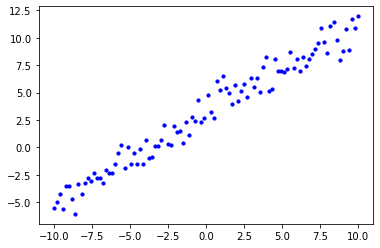

In [2]:
# Sample 100 points near a line
N = 100
M, C = .78, 3.07
X = np.linspace(-10, 10, N)
Y = (M*X + C) + np.random.randn(N)
plt.scatter(X, Y, s=10, c='b')

In [3]:
# Initialize m and c
m = 0
c = 0
i = 0

In [4]:
while i<1000:
    Y_hat = m*X + c
    costs = (Y_hat-Y)**2    
    loss = np.sum(costs)/N
    dY_hat = 2/N*(Y_hat-Y)
    dm = np.dot(dY_hat, X)
    dc = np.sum(dY_hat)
    m-=.001*dm
    c-=.001*dc
    if i%100==0:
        print('Loss = %f' %loss)
    i+=1


Loss = 33.392854
Loss = 7.426058
Loss = 5.276075
Loss = 3.835486
Loss = 2.870218
Loss = 2.223438
Loss = 1.790062
Loss = 1.499678
Loss = 1.305106
Loss = 1.174732


Original parameters: {m:0.780000, c: 3.070000}
Predicted parameters: {m:0.818062, c: 2.697257}


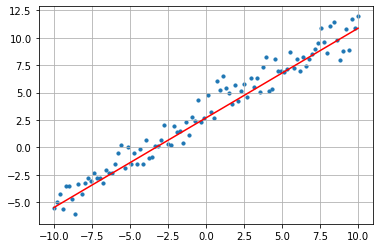

In [5]:
plt.grid()
plt.scatter(X, Y, 10)
plt.plot(X, m*X+c, 'r')
print("Original parameters: {m:%f, c: %f}" %(M, C))
print("Predicted parameters: {m:%f, c: %f}" %(m, c))


## Let us make our code modular


Initialize $\theta$<br>
i = 0 <br>
while i < 1000:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$Y_{hat}, loss = forwardProp(\theta, X, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\partial \theta = backProp(X, Y_{hat}, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\theta = update(\theta, \partial \theta)$<br>



The equations for forward prop (1st 2) and backward prop (last) are:
\begin{equation}
\hat Y = mX + c \\
L = \frac1N \times \sum_{i=1}^{N} (\hat Y_i-Y_i)^2 \\
\frac{\partial{L}}{\partial \hat Y} = \frac2N \times \sum_{i=1}^{N} (\hat Y_i-Y_i) \\
\end{equation}

In [6]:
import numpy as np
class LinearRegression:
    def __init__(self, M=.78, C=3.07, num_steps=1000, learning_rate=.001):
        self.X, self.Y = self.sample_data(M, C)
        self.num_steps = num_steps
        self.learning_rate = learning_rate

    def sample_data(self, M, C, N=100):
        X = np.linspace(-10, 10, N)
        Y = (M*X + C) + np.random.randn(N)
        return X, Y

    def forward_prop(self, theta, X, Y):
        N = X.shape[0]
        m, c = theta['m'], theta['c']
        Y_hat = m*X + c
        costs = (Y_hat-Y)**2
        loss = np.sum(costs)/N
        return Y_hat, loss

    def back_prop(self, X, Y_hat, Y):
        N = X.shape[0]
        dY_hat = 2/N*(Y_hat-Y)
        dm = np.dot(dY_hat, X)
        dc = np.sum(dY_hat)
        dtheta = {'dm': dm, 'dc': dc}
        return dtheta

    def update(self, theta, dtheta):
        theta['m']-=self.learning_rate*dtheta['dm']
        theta['c']-=self.learning_rate*dtheta['dc']
        return theta

    def fit(self):
        self.theta = {'m': 0, 'c': 0}
        i = 0
        while i<self.num_steps:
            Y_hat, loss = self.forward_prop(self.theta, self.X, self.Y)
            dtheta = self.back_prop(self.X, Y_hat, self.Y)
            self.theta = self.update(self.theta, dtheta)
            if i%100==0:
                print('Loss=%f at %ith iteration' %(loss, i))
            i+=1

    def predict(self, x):
        return self.theta['m']*x + self.theta['c']

In [7]:
regressor = LinearRegression()
regressor.fit()

Loss=31.457046 at 0th iteration
Loss=7.475649 at 100th iteration
Loss=5.289056 at 200th iteration
Loss=3.823936 at 300th iteration
Loss=2.842230 at 400th iteration
Loss=2.184437 at 500th iteration
Loss=1.743681 at 600th iteration
Loss=1.448352 at 700th iteration
Loss=1.250466 at 800th iteration
Loss=1.117873 at 900th iteration


In [8]:
print('For X=100, Y_true = %f, Y_pred = %f' %(100*.78+3.07, regressor.predict(100)))

For X=100, Y_true = 81.070000, Y_pred = 80.773677


In [9]:
# Predicted slope and intercept
regressor.theta

{'m': 0.7805355161568999, 'c': 2.7201258764999374}

## Linear Regression direct equation

Since linear regression loss is directly differetiable with respect to the the model parameters (slope and intercept), we can obtain them directly  by differentiating the loss w.r.t. parameters and equating to 0:

\begin{equation}
L = \frac1N \times \sum_{i=1}^{N} (mX_i + c-Y_i)^2 \\
\frac {\partial L} {\partial m} = \frac2N \times \sum_{i=1}^{N} X_i(mX_i + c-Y_i)  \\
\frac {\partial L} {\partial c} = \frac2N \times \sum_{i=1}^{N} (mX_i + c-Y_i)  \\
\end{equation}

Setting the last eqn to 0 gives us:


\begin{equation}
c =  \bar Y - m \bar X
\end{equation}

Substituting this in the 2nd last eqn and equating to 0 gives us:
\begin{equation}
m \sum_{i=1}^{N} X_i^2 + (\bar Y - m \bar X) \sum_{i=1}^{N} X_i - \sum_{i=1}^{N} X_iY_i  = 0 \\
m \sum_{i=1}^{N} X_i^2 + N \bar X(\bar Y - m \bar X) - \sum_{i=1}^{N} X_iY_i = 0 \\
m = \frac {\sum_{i=1}^{N} X_iY_i - N \bar X \bar Y} {\sum_{i=1}^{N} X_i^2 - N \bar X^2}  \\
\end{equation}



In [31]:
X_bar, Y_bar = np.mean(X), np.mean(Y)
m = (np.dot(X, Y) - N*X_bar*Y_bar)/(np.sum(np.power(X, 2)) - N*(X_bar**2))
c = Y_bar - m*X_bar

In [32]:
m, c

(0.8180617202083262, 3.118449152689907)

which is quite close to our actual slope and intercept of .78 and 3.07

Note that we can also write the equation for m as

\begin{equation}
m = \frac {(X_i - \bar X)(Y_i - \bar Y)} {(X_i - \bar X)^2} \\ 
m = \frac {Cov(X, Y)} {Var(X)} \\
\end{equation}